Se quiere calcular integrales de la forma:

$$I(a,b) = \int^b_a f(x) dx$$

In [1]:
# Definimos la función a integrar

def function(x):
    return x**4 - 2*x + 1

Definimos

$N$: Número de pasos

$h = \frac{b-a}{N}$

$[a,b]$: Intervalo de integración

In [2]:
# Definimos los parámetros de integración

a, b = 0.0, 2.0 #Intervalo de integración
N = 10 #Número de pasos
h = (b-a)/N

# Trapezoidal Rule

La aproximación se hace mediante la suma de áreas de trapezoides

$$I(a,b) = h \left[ \frac{1}{2} f(a) + \frac{1}{2} f(b) + \sum_{k=1}^{N-1} f(a+k\cdot h) \right]$$

In [3]:
# Aproximación de la integral por la regla del trapecio

def int_trapezoidal(f,a,b,N,h):
    S = h*(f(a) + f(b))/2
    for k in range(1,N):
        S += h*f(a+k*h)
    return S

In [7]:
It = int_trapezoidal(function,a,b,N,(b-a)/N)
print("La aproximación por regla del trapecio de I(a,b) es",It)

La aproximación por regla del trapecio de I(a,b) es 4.426660000000002


# Simpson's Rule

La aproximación de la función se hace mediante curvas cuadráticas.

$$I(a,b) = \frac{1}{3} h \left[ f(a) + f(b) + 4 \sum_{k \ impar} f(a+k\cdot h) + 2 \sum_{k \ par} f(a+k\cdot h) \right]$$

In [8]:
# Aproximación de la integral por regla de Simpson

def int_simpson(f,a,b,N,h):
    S = h*(f(a) + f(b))/3
    for k in range(1,N):
        S += 4*h*f(a+k*h)/3 if k%2 == 1 else 2*h*f(a+k*h)/3 #Operador ternario
#     for k in range(1,N,2): #Suma de los impares
#         S += 4*h*f(a+k*h)/3
#     for k in range(2,N,2): #Suma de los pares
#         S += 2*h*f(a+k*h)/3
    return S

In [9]:
Is = int_simpson(function,a,b,N,h)
print("La aproximación por regla de Simpson de I(a,b) es",Is)

La aproximación por regla de Simpson de I(a,b) es 4.400426666666668


# Ejercicios

5.3. Consider the integral

$$E(x) = \int_0^x e^{-t^2} dt$$

a) Write a program to calculate E(x) for values of x from 0 to 3 in steps of 0.1

b) Make a graph of E(x) as a function of x

In [10]:
a = 0.0
b = 3.0
h = 0.1
N = 30

In [13]:
from math import *

def aux(t): #integrando
    return exp(-t**2)

def E(x):
    haux = (x-a)/N
    return int_simpson(aux,a,x,N,haux)

In [11]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(a,b+h,h)

In [14]:
E = np.array([E(x) for x in x])

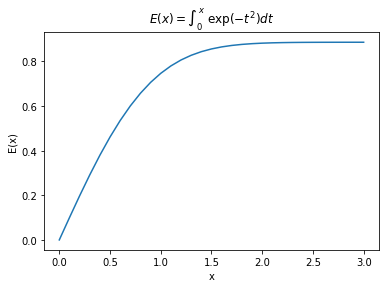

In [15]:
plt.plot(x,E)
plt.xlabel("x")
plt.ylabel("E(x)")
plt.title(r"$E(x) = \int_0^x \ \exp (-t^2) dt$")
plt.show()

5.4. La intensidad de la luz en el patrón de difracción producido por una fuente puntual de luz al ser observada a través de un telescopio, está dada por

$$I(r) = \left( \dfrac{J_1(kr)}{kr} \right)^2$$

donde

$r$: distancia en el plano focal desde el centro del patrón

$k = \frac{2\pi}{\lambda}$

$J_1$: Función de Bessel

Las funciones de Bessel $J_m(x)$ están dadas por

$$J_m(x) = \dfrac{1}{\pi} \int_0^\pi \cos(m\theta - x\sin\theta) \ d\theta$$

a) Escriba una función J(m,x) que calcule $J_m(x)$ usando la regla de Simpson con N=1000. Grafique $J_0, J_1, J_2$ de $x=0$ a $x=20$

b) En un segundo programa, grafique la intensidad del patrón de difracción circular de una fuente puntual con $\lambda = 500 nm$ y con $r$ desde 0 hasta $1 \mu m$

In [17]:
a = 0
b = np.pi
N = 100
h = (b-a)/N

In [18]:
def intJ(m,x,theta): #Integrando de la funcion de Bessel
    return np.cos(m*theta - x*np.sin(theta))

def J(m,x):
    return int_simpson(lambda t: intJ(m,x,t),a,b,N,h)/np.pi

In [19]:
x = np.linspace(0,20,200)

J0 = J(0,x)
J1 = J(1,x)
J2 = J(2,x)

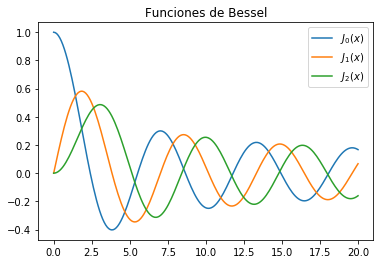

In [20]:
plt.plot(x,J0,label=r'$J_0(x)$')
plt.plot(x,J1,label=r'$J_1(x)$')
plt.plot(x,J2,label=r'$J_2(x)$')
plt.legend()
plt.title("Funciones de Bessel")
plt.show()

In [21]:
lamb = 500e-9
k = 2*np.pi/lamb
r, phi = np.meshgrid(np.linspace(0,1.0e-6,100),np.linspace(0,2*np.pi,100))

def intensity(r,phi):
    return (J(1,k*r)/(k*r))**2

I = intensity(r,phi)

/home/alejandra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


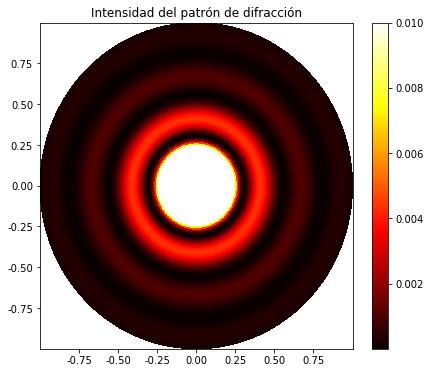

In [22]:
fig,ax = plt.subplots(figsize=(7,6))

graph = ax.pcolormesh(r*np.cos(phi),r*np.sin(phi),I,cmap='hot',vmax=0.01)
fig.colorbar(graph)
plt.yticks([-7.5e-7,-5.0e-7,-2.5e-7,0.0,2.5e-7,5.0e-7,7.5e-7],['-0.75','-0.50','-0.25','0.00','0.25','0.50','0.75'])
plt.xticks([-7.5e-7,-5.0e-7,-2.5e-7,0.0,2.5e-7,5.0e-7,7.5e-7],['-0.75','-0.50','-0.25','0.00','0.25','0.50','0.75'])
ax.set_title("Intensidad del patrón de difracción")
plt.show()